# Tweaking the profilers parameters

In [1]:
import tslumen
import pandas as pd
from pprint import pprint

In [2]:
# patch it
_read_csv = pd.read_csv
pd.read_csv = lambda fpath, *args, **kwargs: _read_csv(fpath.split('/')[-1], *args, **kwargs)

In [3]:
df = pd.read_csv(
    'https://datahub.io/core/gdp/r/gdp.csv', 
    parse_dates=[2], 
    date_parser=lambda dt: pd.to_datetime(f'{dt}-12-31'),
)
df = df[df['Country Code'].isin(['WLD', 'EUU', 'USA', 'HIC', 'MIC', 'LIC'])]\
    .set_index(['Year', 'Country Code'])['Value'].unstack(1)
meta = {
    'frame': {
        'Description': 'Country, regional and world GDP in current US Dollars ($).',
        'Source': '<a href="https://datahub.io/core/gold-prices">DataHub</a>',
    },
    'series': {
        'WLD': 'World GDP in current USD',        
        'EUU': 'European Union GDP in current USD',
        'USA': 'United States GDP in current USD',
        'HIC': 'High income GDP in current USD',
        'MIC': 'Middle income GDP in current USD',
        'LIC': 'Low income GDP in current USD',
    }
}

Unless explicitly provided, *tslumen*'s `HtmlReport` uses the `DefaultProfiler` to profile the time series data.  
A dictionary with all the configurations can be obtained by calling its class method `get_config_defaults`.

In [4]:
pprint(tslumen.DefaultProfiler.get_config_defaults())

{'acf': {'adjusted': False,
         'alpha': 0.05,
         'fft': False,
         'lags': 40,
         'missing': 'none'},
 'acf_1d': {'adjusted': False,
            'alpha': 0.05,
            'fft': False,
            'lags': 40,
            'missing': 'none'},
 'acf_2d': {'adjusted': False,
            'alpha': 0.05,
            'fft': False,
            'lags': 40,
            'missing': 'none'},
 'adfuller_stationarity': {'confidence_level': 0.05},
 'binned': {'nbins': None},
 'corr_kendall': {},
 'corr_pearson': {},
 'corr_spearman': {},
 'cov': {},
 'df_scaled': {},
 'dt_end': {},
 'dt_start': {},
 'freq': {},
 'ft_acf': {'n_diff': (0, 1, 2), 'n_size': (1, 10)},
 'ft_adfuller': {},
 'ft_cross_pts': {},
 'ft_entropy': {'n_per_segment': None, 'sampling_frequency': 1.0},
 'ft_kpss': {},
 'ft_pacf': {'n_diff': (0, 1, 2), 'n_size': (5,)},
 'ft_stl': {'freq': None},
 'ft_tilewin': {},
 'granger_causality': {'addconst': True,
                       'adf_confidence': 0.1,
             

In this example we'll be changing the confidence level of the statistical tests.

In [5]:
profiler_config = {
    'adfuller_stationarity': {'confidence_level': 0.17},
    'jarque_bera_normality': {'confidence_level': 0.17},
    'kpss_stationarity': {'confidence_level': 0.17},
    'levene_constant_variance': {'confidence_level': 0.17},
    'ljungbox_autocorrelation': {'confidence_level': 0.17},
    'omnibus_normality': {'confidence_level': 0.17},
}

After rendering the report, you can see on the *Stats* tab, *Confidence* column, that all values are now set to `0.17`.

Profiling:   0%|          | 0/312 [00:00<?, ?it/s]

Rendering TimeSeries section:   0%|          | 0/6 [00:00<?, ?it/s]

Rendering remaining sections: 0it [00:00, ?it/s]


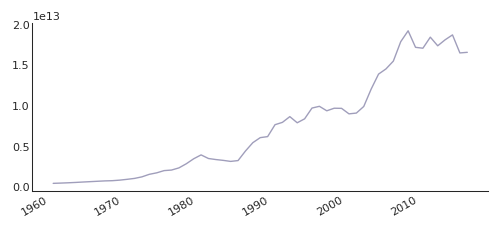
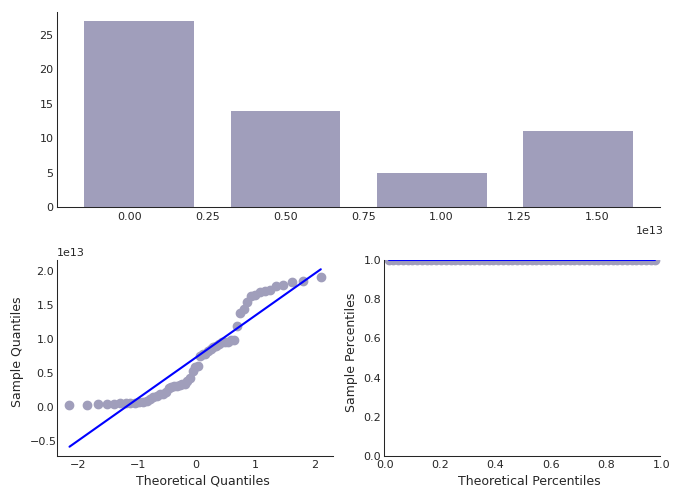
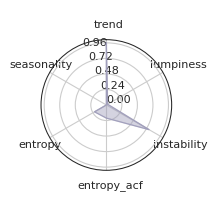
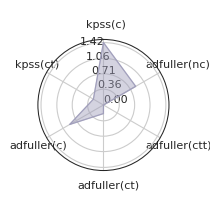
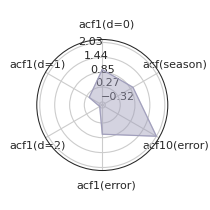
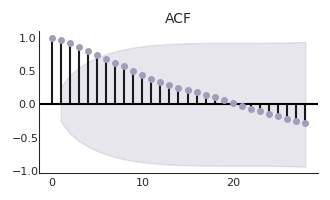
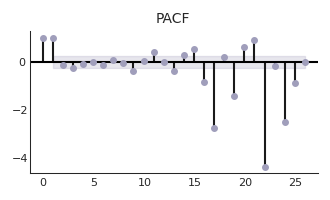
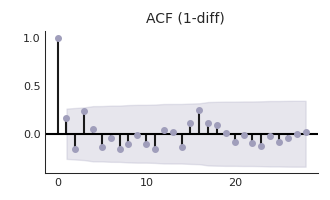
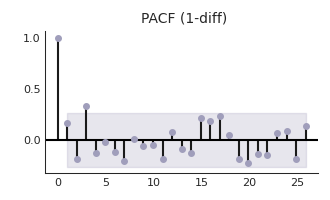
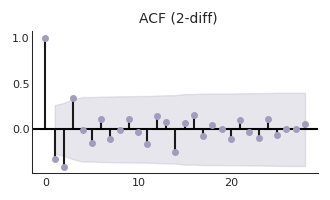
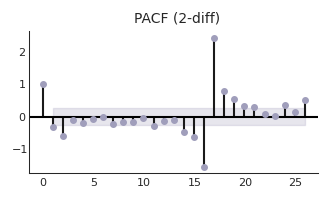
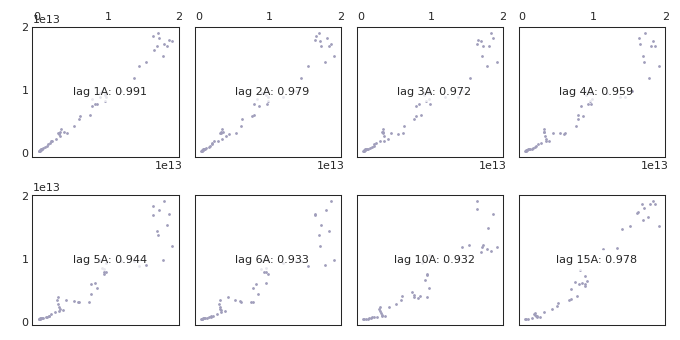
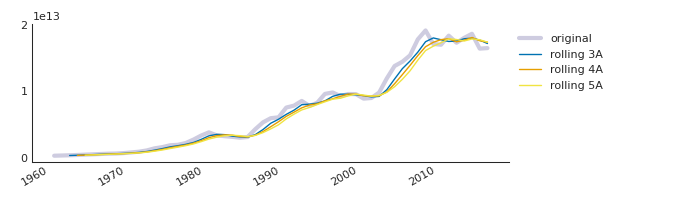
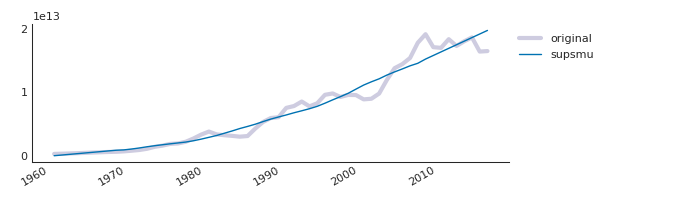
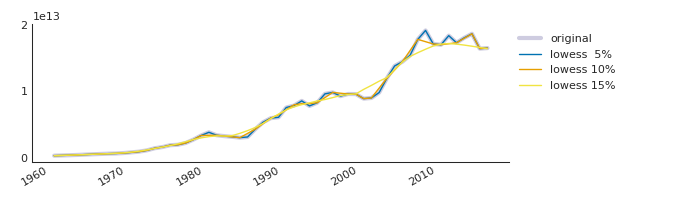
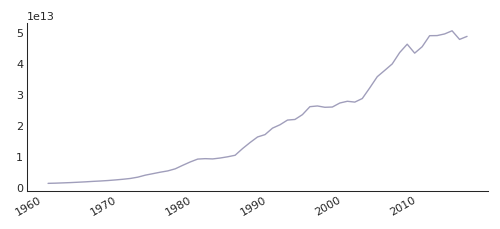
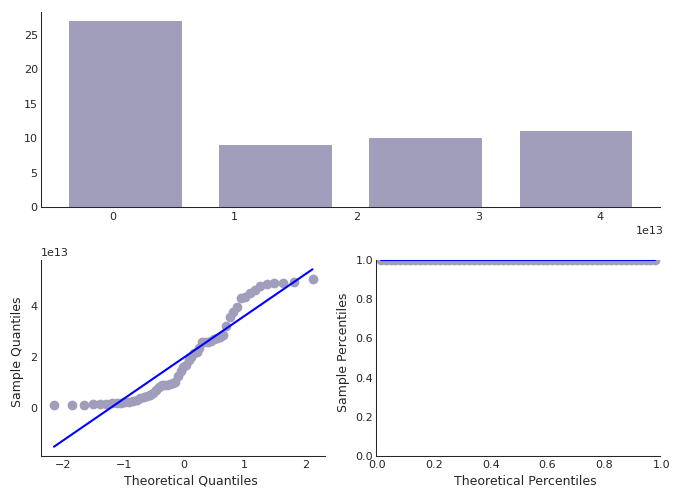
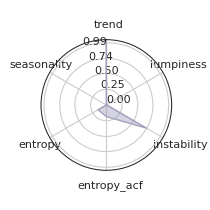
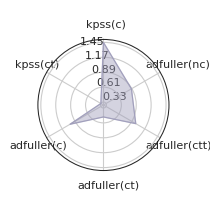
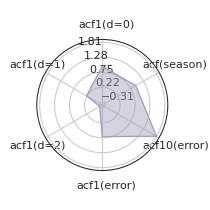
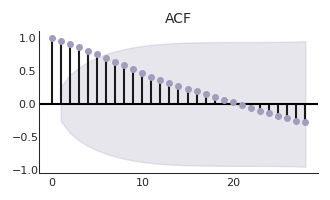
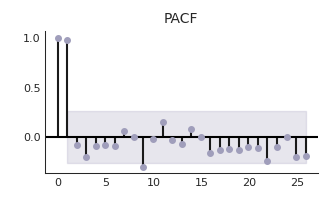
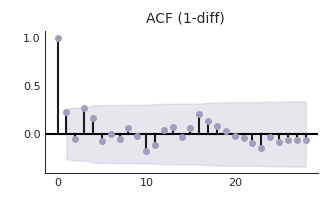
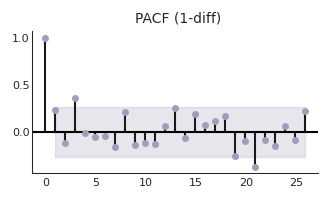
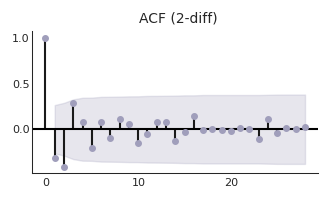
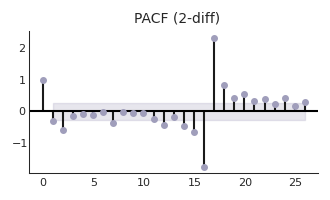
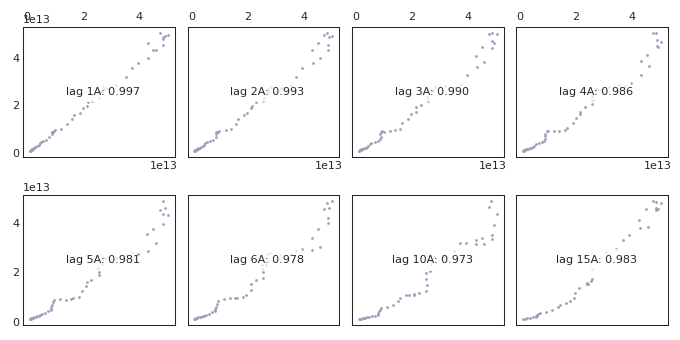
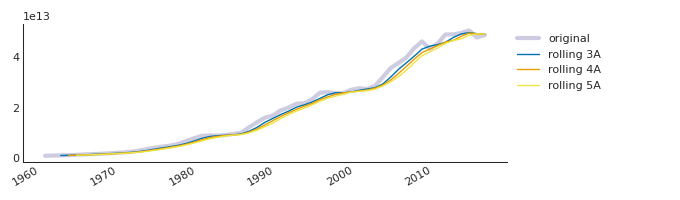
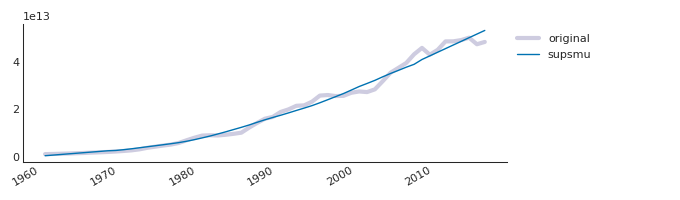
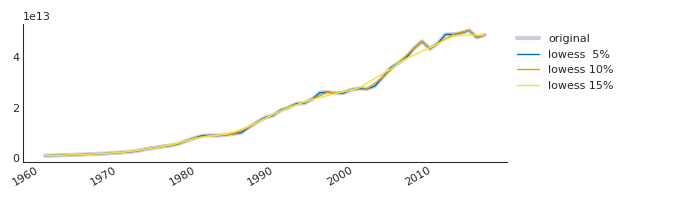
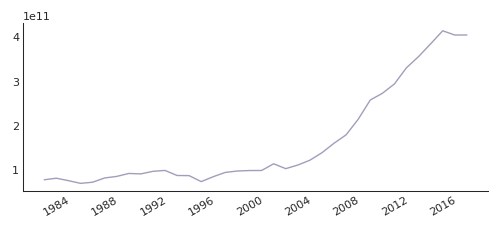
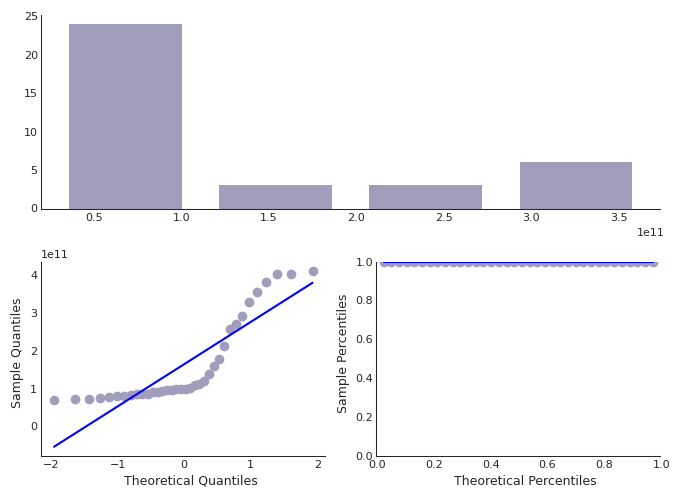
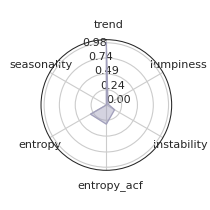
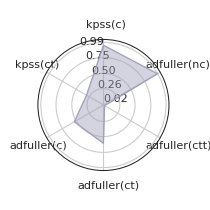
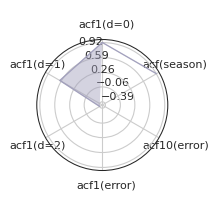
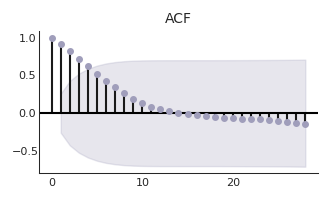
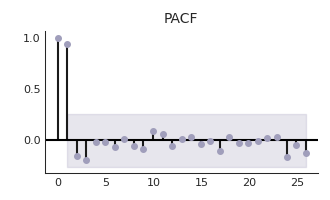
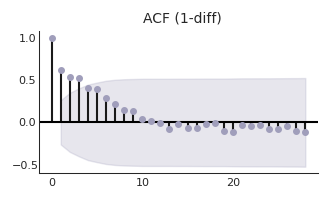
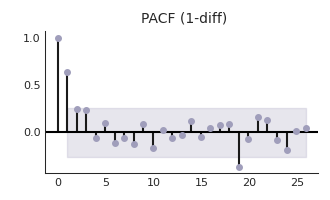
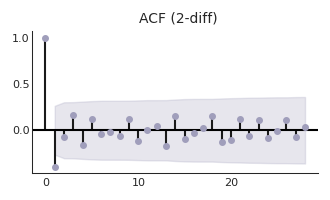
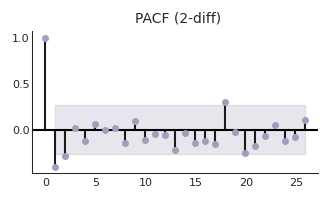
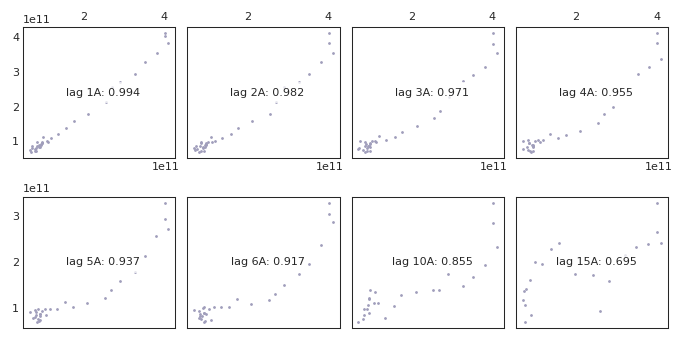
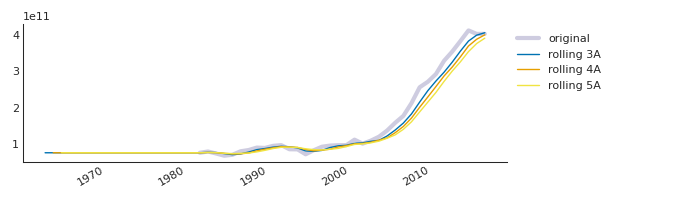
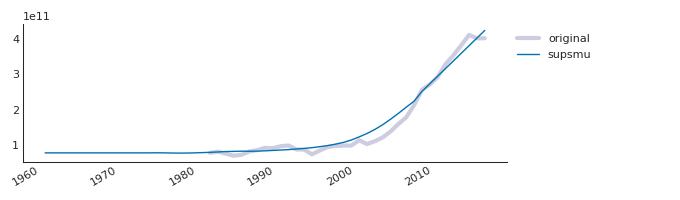
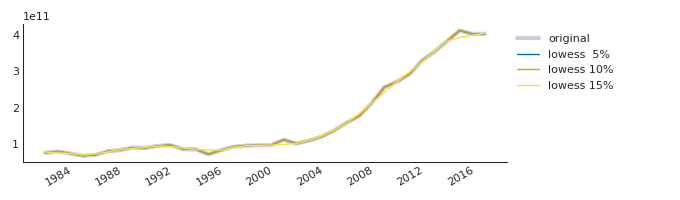
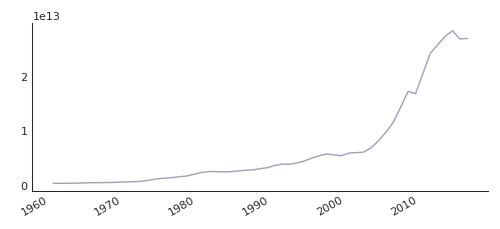
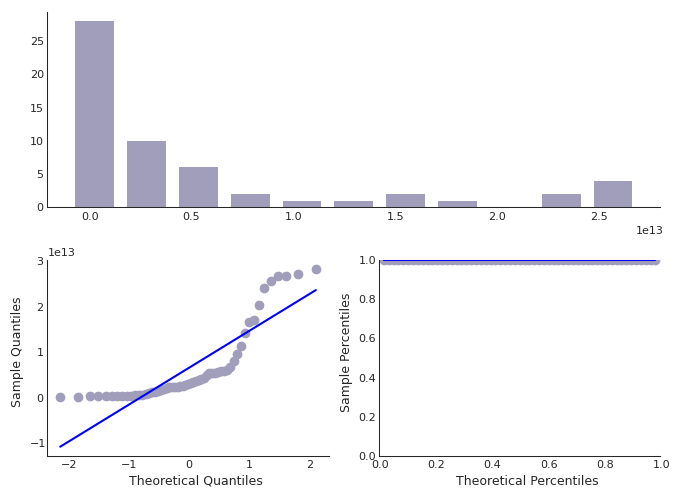
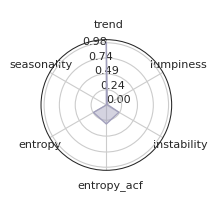
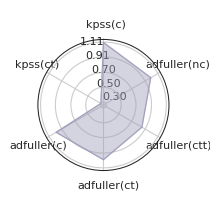
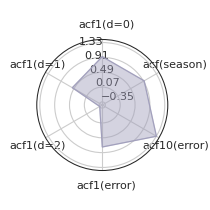
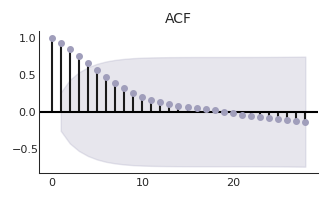
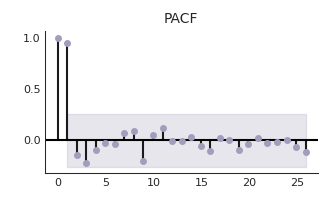
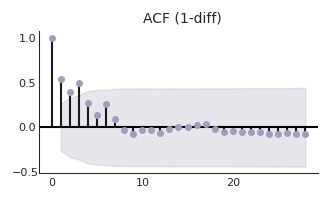
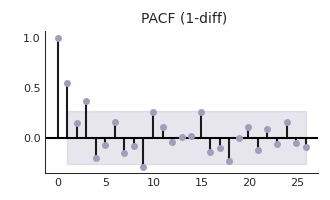
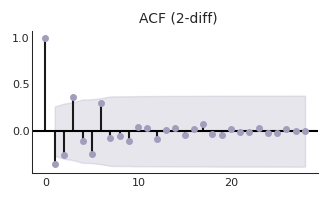
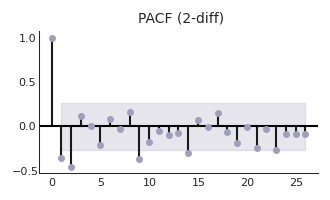
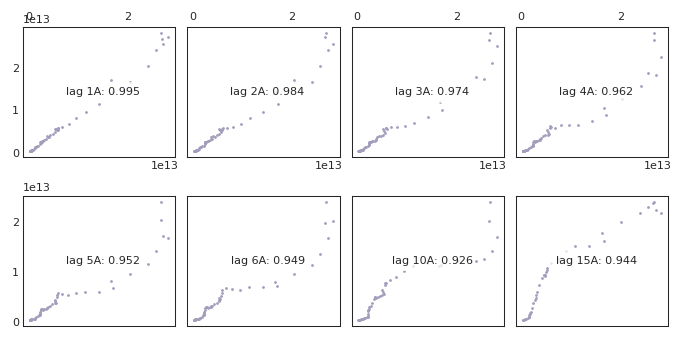
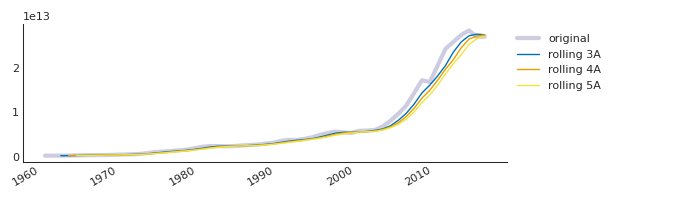
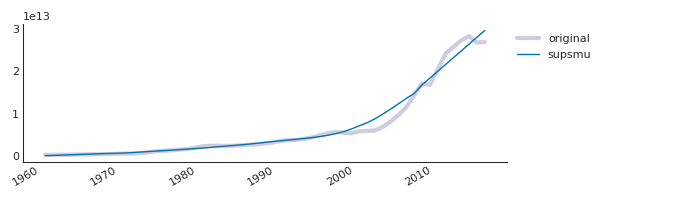
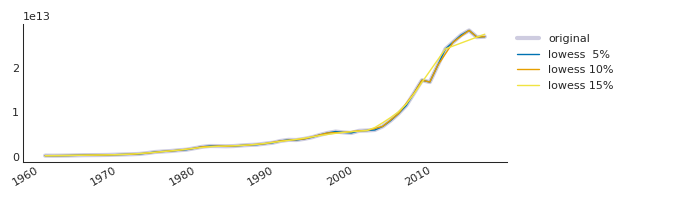
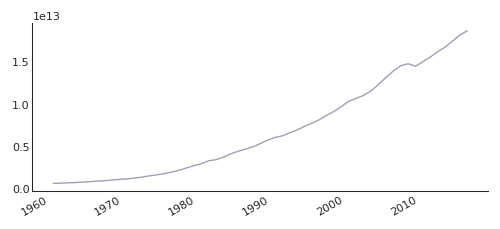
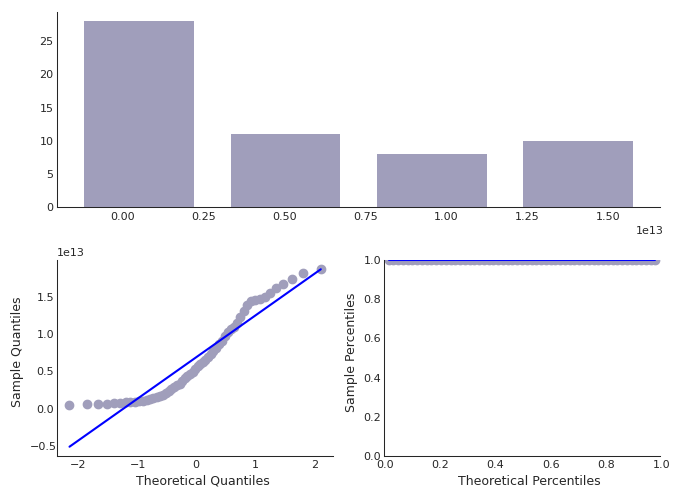
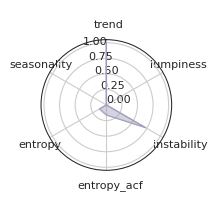
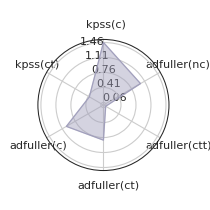
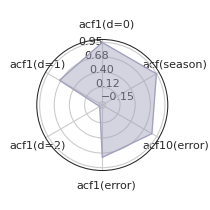
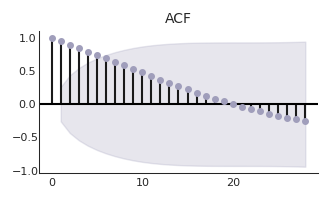
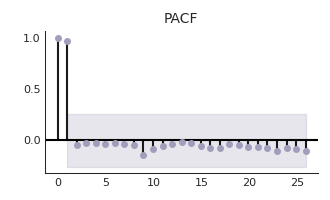
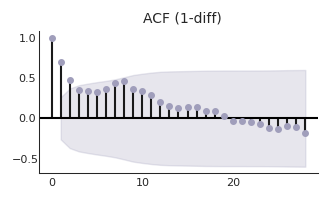
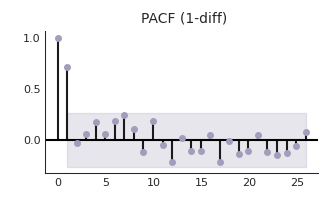
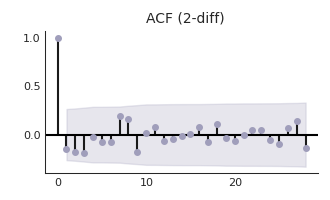
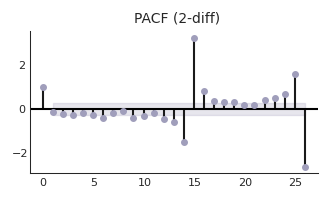
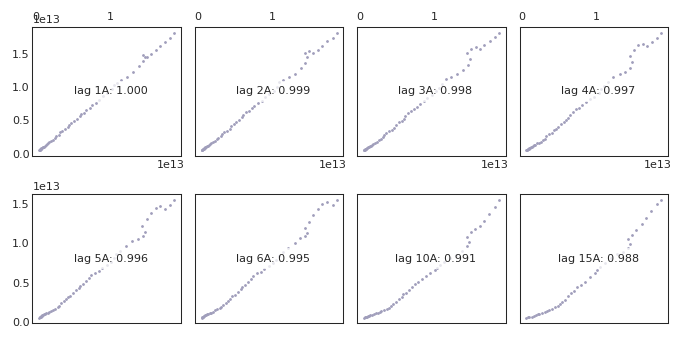
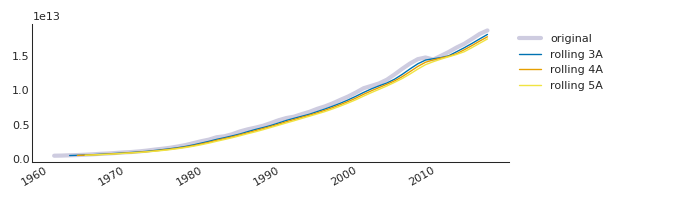
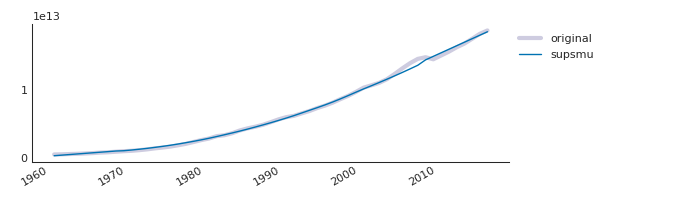
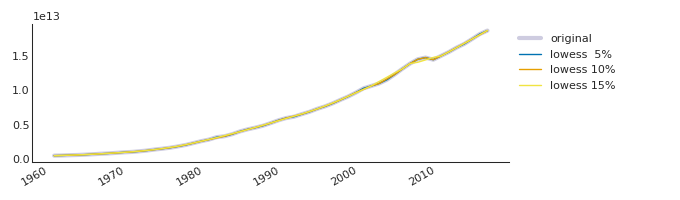
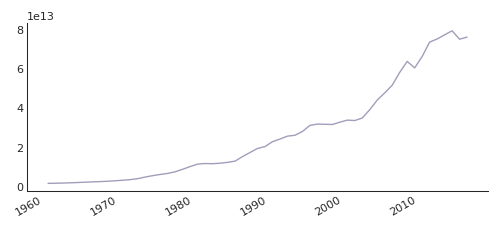
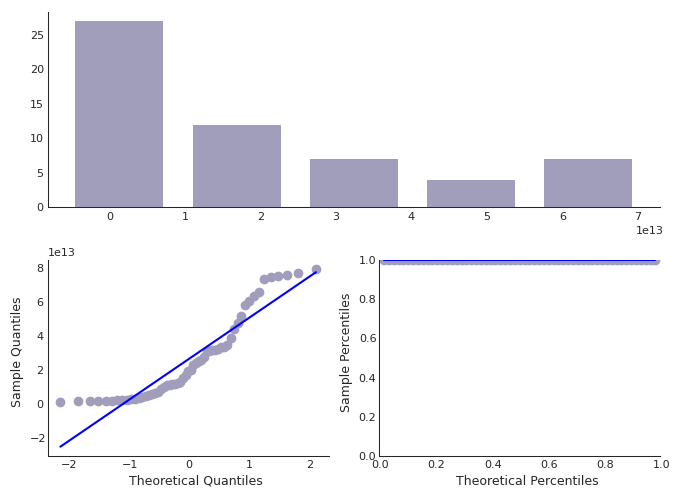
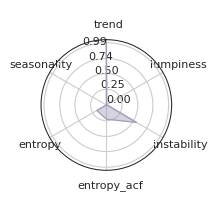
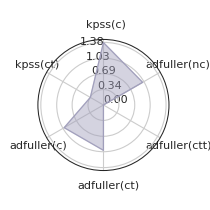
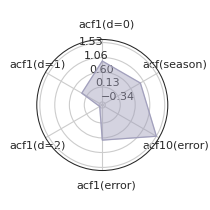
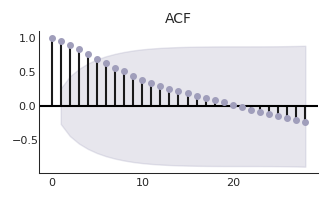
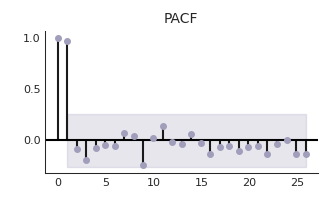
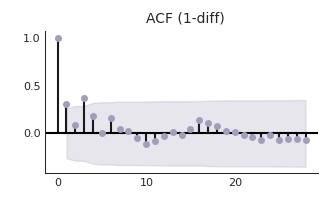
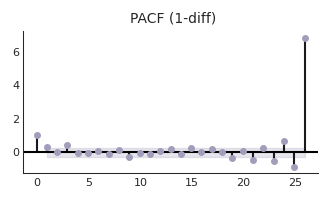
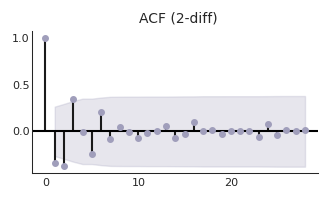
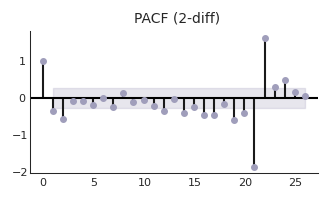
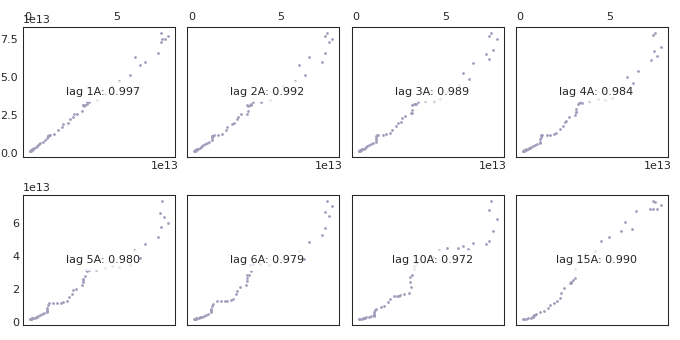
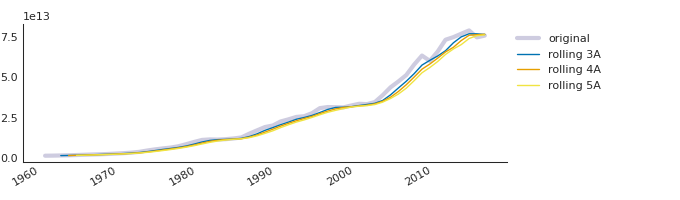
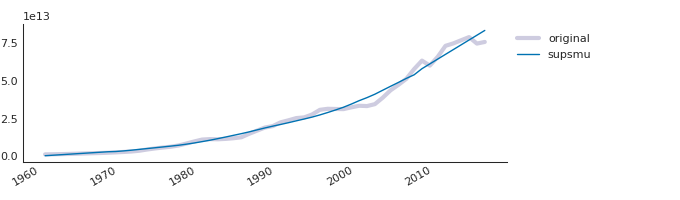
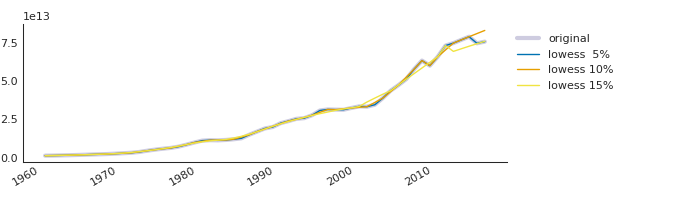

In [6]:
report = tslumen.HtmlReport(df, meta, profiler_config=profiler_config)
report.SECTIONS = report.SECTIONS[1:2]
report